# Explore the Absolute & Weighted Frequencies of Words in a Corpus of Documents

In [2]:
from collections import defaultdict
import pandas as pd

### Loop through a document, split it into words, & count the occurrences

In [3]:
text_list = ['france', 'spain', 'spain beaches', 'france beaches', 'spain best beaches']

word_freq = defaultdict(int)

for text in text_list:
    for word in text.split():
        word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient = 'index') \
.sort_values(0, ascending = False) \
.rename(columns = {0: 'abs_freq'})

,abs_freq
spain,3
beaches,3
france,2
best,1


## Weighted Frequencies
* Considers how many times words appear to readers, in addition to their corpus occurrences
* Calculate the weighted frequencies - given the following views:
    * France (200), spain (180), spain beaches (170), france beaches (160), spain best beaches (160)

In [4]:
# default dict is now a list with two ints
word_freq = defaultdict(lambda: [0, 0]) 

# views column 
num_list = [200, 180, 170, 160, 160]

# loop over both the text and the numbers
for text, num in zip(text_list, num_list): 
    for word in text.split(): 
        word_freq[word][0] += 1 
        
        # new line, incrementing the numeric value for each word
        word_freq[word][1] += num 

columns = {0: 'abs_freq', 1: 'wtd_freq'}

abs_wtd_df = pd.DataFrame.from_dict(word_freq, orient='index') \
             .rename(columns=columns) \
             .sort_values('wtd_freq', ascending=False) \
             .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']) \
            .round()

abs_wtd_df.style.background_gradient(low=0, high=.7, subset=['rel_value'])

,abs_freq,wtd_freq,rel_value
spain,3,510,170
beaches,3,490,163
france,2,360,180
best,1,160,160


* rel_value reveals the weighted value per occurrence
* 'france' has the highest rel_value, but 'spain' and 'beaches' have higher weighted frequencies

### Show additional metrics - Cumulative percentages for absolute and weighted frequencies

In [5]:
abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())

abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())

abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())

abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

abs_wtd_df.style.background_gradient(low=0, high=0.8)

,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
spain,3,0.333333,0.333333,510,0.335526,0.335526,170
beaches,3,0.333333,0.666667,490,0.322368,0.657895,163
france,2,0.222222,0.888889,360,0.236842,0.894737,180
best,1,0.111111,1,160,0.105263,1,160


## Analyze Movie Title Data - from Boxoffice Mojo
* Absolute frequencies - words used most in titles
* Weighted frequencies - words associated with highest revenues

In [6]:
import requests
from bs4 import BeautifulSoup

#### Scrape the data using Beautiful Soup

In [7]:
final_list = []

for i in range(1, 156):
    if not i%10:
        print(i)
    page = 'http://www.boxofficemojo.com/alltime/domestic.htm?page=' + str(i) + '&p=.htm'
    resp = requests.get(page)
    soup = BeautifulSoup(resp.text, 'lxml')
    
    # trial and error to get the exact positions
    table_data = [x.text for x in soup.select('tr td')[11:511]]  
    
    # put every 5 values in a row
    temp_list = [table_data[i:i+5] for i in range(0, len(table_data[:-4]), 5)] 
    
    for temp in temp_list:
        final_list.append(temp)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


#### Place these records into a DataFrame - View the first & last 10

In [10]:
boxoffice_df = pd.DataFrame.from_records(final_list)

boxoffice_df.head(15)

,0,1,2,3,4
0,1,Star Wars: The Force Awakens,BV,"$936,662,225",2015
1,2,Avengers: Endgame,BV,"$820,817,940",2019
2,3,Avatar,Fox,"$760,507,625",2009^
3,4,Black Panther,BV,"$700,059,566",2018
4,5,Avengers: Infinity War,BV,"$678,815,482",2018
5,6,Titanic,Par.,"$659,363,944",1997^
6,7,Jurassic World,Uni.,"$652,270,625",2015
7,8,Marvel's The Avengers,BV,"$623,357,910",2012
8,9,Star Wars: The Last Jedi,BV,"$620,181,382",2017
9,10,Incredibles 2,BV,"$608,581,744",2018


In [11]:
boxoffice_df.tail(15)

,0,1,2,3,4
15485,15486,Rage (Rabia),Strand,"$5,594",2011
15486,15487,Chic!,Distrib.,"$5,587",2015
15487,15488,Elevate,Vari.,"$5,580",2011
15488,15489,Our Man in Tehran,FRun,"$5,573",2015
15489,15490,Kid Cannabis,WGUSA,"$5,565",2014
15490,15491,Bookers Place,Trib.,"$5,549",2012
15491,15492,Oro,Sony,"$5,539",2017
15492,15493,Gabrielle (2014),EOne,"$5,534",2014
15493,15494,Gogol Bordello Non-Stop,Lorb.,"$5,532",2009
15494,15495,American Grindhouse,Lorb.,"$5,529",2010


#### Check for null values and typos

In [12]:
na_year_idx =  [i for i, x in enumerate(final_list) if x[4] == 'n/a']

print(*[(i, x) for i, x in enumerate(final_list) if i in na_year_idx], sep='\n')

(8305, ['8306', 'Warner Bros. 75th Anniversary Film Festival', 'WB', '$741,855', 'n/a'])
(8458, ['8459', 'Hum Aapke Dil Mein Rahte Hain', 'Eros', '$668,678', 'n/a'])
(8510, ['8511', 'Purple Moon (Re-issue)', 'Mira.', '$640,945', 'n/a'])
(10995, ['10996', 'Amarcord', 'Jan.', '$125,493', 'n/a'])


#### Replace these n/a values with the appropriate years
* 1998, 1999, 1960, 1973 respectively

In [14]:
new_years = [1998, 1999, 1960, 1973]

for na_year, new_year in zip(na_year_idx, new_years):
    final_list[na_year][4] = new_year
    
    print(final_list[na_year], new_year)

['8306', 'Warner Bros. 75th Anniversary Film Festival', 'WB', '$741,855', 1998] 1998
['8459', 'Hum Aapke Dil Mein Rahte Hain', 'Eros', '$668,678', 1999] 1999
['8511', 'Purple Moon (Re-issue)', 'Mira.', '$640,945', 1960] 1960
['10996', 'Amarcord', 'Jan.', '$125,493', 1973] 1973


#### Add column names - Convert to desired data types

In [15]:
import re

In [16]:
regex = '|'.join(['\$', ',', '\^'])

columns = ['rank', 'title', 'studio', 'lifetime_gross', 'year']

# convert rank to integer
# use title as is
# use studio as is
# remove typo characters, convert gross to integer
# remove typo characters, convert year to integer

boxoffice_df = pd.DataFrame({
    'rank': [int(x[0]) for x in final_list],  
    'title': [x[1] for x in final_list], 
    'studio': [x[2] for x in final_list],  
    'lifetime_gross': [int(re.sub(regex, '', x[3])) for x in final_list], 
    'year': [int(re.sub(regex, '', str(x[4]))) for x in final_list], 
})

print('rows:', boxoffice_df.shape[0])
print('columns:', boxoffice_df.shape[1])
print('\ndata types:')
print(boxoffice_df.dtypes)

rows: 15500
columns: 5

data types:
rank               int64
title             object
studio            object
lifetime_gross     int64
year               int64
dtype: object


#### View these changes

In [17]:
boxoffice_df.head(15)

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,820817940,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018
5,6,Titanic,Par.,659363944,1997
6,7,Jurassic World,Uni.,652270625,2015
7,8,Marvel's The Avengers,BV,623357910,2012
8,9,Star Wars: The Last Jedi,BV,620181382,2017
9,10,Incredibles 2,BV,608581744,2018


#### As above, check the frequency values of this DataFrame

In [18]:
def word_frequency(text_list, num_list, sep=None):
    word_freq = defaultdict(lambda: [0, 0])

    for text, num in zip(text_list, num_list):
        for word in text.split(sep=sep): 
            word_freq[word][0] += 1 
            word_freq[word][1] += num

    columns = {0: 'abs_freq', 1: 'wtd_freq'}

    abs_wtd_df = (pd.DataFrame.from_dict(word_freq, orient='index')
                 .rename(columns=columns )
                 .sort_values('wtd_freq', ascending=False)
                 .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']).round())

    abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
    abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
    abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
    abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

    return abs_wtd_df

In [19]:
word_frequency(boxoffice_df['title'], boxoffice_df['lifetime_gross']).head()

,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
The,3084,0.068832,0.068832,69844602089,0.080219,0.080219,22647407.0
the,1307,0.029171,0.098002,33703183242,0.038709,0.118928,25786674.0
of,1386,0.030934,0.128937,30682251526,0.035240,0.154168,22137267.0
and,535,0.011941,0.140877,12496194774,0.014352,0.168520,23357373.0
2,162,0.003616,0.144493,10114062567,0.011616,0.180137,62432485.0


* Stopwords appear to be at the top of the list

#### Remove stopwords
* by adding a parameter to the function, identifying the words

#### Address duplicate, lowercase, stopwords
* using lower( ) 

In [20]:
def word_frequency(text_list, num_list, sep=None, rm_words=('the', 'and', 'a')):  
    word_freq = defaultdict(lambda: [0, 0])

    for text, num in zip(text_list, num_list):
        for word in text.split(sep=sep): 
            
            if word.lower() in rm_words:  
                continue                  
            
            word_freq[word.lower()][0] += 1  
            word_freq[word.lower()][1] += num

    columns = {0: 'abs_freq', 1: 'wtd_freq'}

    abs_wtd_df = (pd.DataFrame.from_dict(word_freq, orient='index')
                 .rename(columns=columns )
                 .sort_values('wtd_freq', ascending=False)
                 .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']).round())

    abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
    abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
    abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
    abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

    abs_wtd_df = abs_wtd_df.reset_index().rename(columns={'index': 'word'})

    return abs_wtd_df

In [21]:
from collections import defaultdict
word_freq_df =  word_frequency(boxoffice_df['title'], 
                               boxoffice_df['lifetime_gross'],
                               rm_words=['of','in', 'to', 'and', 'a', 'the', 
                                         'for', 'on', '&', 'is', 'at', 'it',
                                         'from', 'with'])



word_freq_df.head(15).style.bar(['abs_freq', 'wtd_freq', 'rel_value'],
                                               color='#60DDFF')

,word,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
0,2,162,0.00450538,0.00450538,10114062567,0.014666,0.014666,6.24325e+07
1,star,49,0.00136274,0.00586812,5809047683,0.00842346,0.0230894,1.18552e+08
2,man,195,0.00542314,0.0112913,4056476632,0.00588213,0.0289716,2.08024e+07
3,part,42,0.00116806,0.0124593,3368716486,0.00488483,0.0338564,8.02075e+07
4,3,65,0.00180771,0.014267,3333151238,0.00483326,0.0386897,5.12792e+07
5,movie,121,0.00336513,0.0176322,3328242064,0.00482614,0.0435158,2.75061e+07
6,ii,68,0.00189115,0.0195233,3193438859,0.00463067,0.0481465,4.69623e+07
7,wars:,6,0.000166866,0.0196902,2757497155,0.00399853,0.052145,4.59583e+08
8,-,67,0.00186334,0.0215535,2700469093,0.00391584,0.0560608,4.03055e+07
9,last,135,0.00375448,0.025308,2672207318,0.00387486,0.0599357,1.97941e+07


#### Sort this DataFrame - by Absolute frequency

In [22]:
(word_freq_df.sort_values('abs_freq', ascending = False)
 .head(15)
    .style.bar(['abs_freq', 'wtd_freq', 'rel_value'],
               color = '#60DDFF'))

,word,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
29,love,206,0.00572907,0.073421,1608947730,0.00233307,0.11978,7.81043e+06
2,man,195,0.00542314,0.0112913,4056476632,0.00588213,0.0289716,2.08024e+07
27,my,185,0.00514503,0.0638819,1682790232,0.00244014,0.115111,9.09616e+06
17,i,163,0.00453319,0.0439414,2241486424,0.00325029,0.0877057,1.37514e+07
0,2,162,0.00450538,0.00450538,10114062567,0.014666,0.014666,6.24325e+07
28,life,137,0.00381011,0.067692,1610794984,0.00233575,0.117447,1.17576e+07
9,last,135,0.00375448,0.025308,2672207318,0.00387486,0.0599357,1.97941e+07
11,me,134,0.00372667,0.0298134,2492964703,0.00361494,0.0673395,1.86042e+07
5,movie,121,0.00336513,0.0176322,3328242064,0.00482614,0.0435158,2.75061e+07
26,you,121,0.00336513,0.0587368,1765098170,0.00255949,0.112671,1.45876e+07


## Visualize the Absolute & Weighted frequencies for comparison

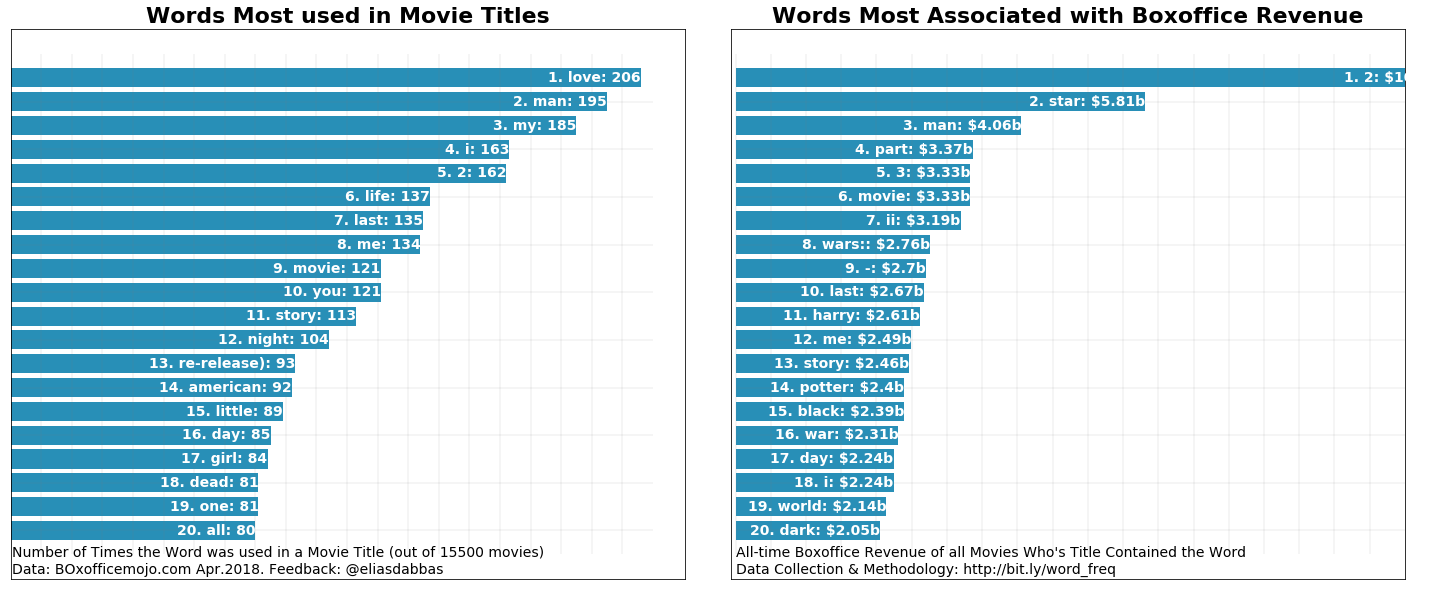

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)

word_freq_df_abs = word_freq_df.sort_values('abs_freq', ascending = False).reset_index()

plt.barh(range(20), list(reversed(word_freq_df_abs['abs_freq'][:20])), color = '#288FB7')

for i, word in enumerate(word_freq_df_abs['word'][:20]):
    plt.text(word_freq_df_abs['abs_freq'][i], 20-i-1,
            s = str(i+1) + '. ' + word + ': ' + str(word_freq_df_abs['abs_freq'][i]),
            ha = 'right', va = 'center', fontsize = 14, color = 'white', fontweight = 'bold')

plt.text(0.4, -1.1, s = 'Number of Times the Word was used in a Movie Title (out of 15500 movies)', fontsize = 14)
plt.text(0.4, -1.8, s = 'Data: BOxofficemojo.com Apr.2018. Feedback: @eliasdabbas', fontsize=14)

plt.vlines(range(0,210,10), -1, 20, colors = 'gray', alpha = 0.1)
plt.hlines(range(0,20,2), 0, 210, colors = 'gray', alpha = 0.1)
plt.yticks([])
plt.xticks([])
plt.title('Words Most used in Movie Titles', fontsize=22, fontweight='bold')


plt.subplot(1,2,2)
plt.barh(range(20), list(reversed(word_freq_df['wtd_freq'][:20])), color = '#288FB7')

for i, word in enumerate(word_freq_df['word'][:20]):
    plt.text(word_freq_df['wtd_freq'][i], 20-i-1,
            s = str(i+1) + '. ' + word + ': ' + '$' + str(round(word_freq_df['wtd_freq'][i] / 1000_000_000, 2)) + 'b',
            ha = 'right', va = 'center', fontsize = 14, color = 'white', fontweight = 'bold')
plt.text(0.4, -1.1, s = "All-time Boxoffice Revenue of all Movies Who's Title Contained the Word", fontsize = 14)
plt.text(0.4, -1.8, s = 'Data Collection & Methodology: http://bit.ly/word_freq', fontsize=14)

plt.vlines(range(0, 9_500_000_000, 500_000_000), -1, 20, colors = 'gray', alpha = 0.1)
plt.hlines(range(0, 20, 2), 0, 10_000_000_000, colors = 'gray', alpha = 0.1)
plt.xlim((-70_000_000, 9_500_000_000))
plt.yticks([])
plt.xticks([])
plt.title('Words Most Associated with Boxoffice Revenue', fontsize = 22, fontweight = 'bold')
plt.tight_layout(pad = 0.01)
plt.show()

* 'love' had the highest absolute frequency
* '2' & 'star' had the highest weighted frequencies

#### Some of the Top Words in the List of Top Movie Titles, do Not appear in the Top Frequencies

In [27]:
boxoffice_df.head(10)

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,820817940,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018
5,6,Titanic,Par.,659363944,1997
6,7,Jurassic World,Uni.,652270625,2015
7,8,Marvel's The Avengers,BV,623357910,2012
8,9,Star Wars: The Last Jedi,BV,620181382,2017
9,10,Incredibles 2,BV,608581744,2018


#### View the Films with the Top Weighted Frequency word - '2'

In [29]:
(boxoffice_df[boxoffice_df['title']
             .str
             .contains('2 | 2', case = False)]
             .head(10))

,rank,title,studio,lifetime_gross,year
9,10,Incredibles 2,BV,608581744,2018
18,19,Shrek 2,DW,441226247,2004
35,36,Guardians of the Galaxy Vol. 2,BV,389813101,2017
36,37,Harry Potter and the Deathly Hallows Part 2,WB,381193157,2011
40,41,Spider-Man 2,Sony,373585825,2004
43,44,Despicable Me 2,Uni.,368061265,2013
63,64,Deadpool 2,Fox,324591735,2018
71,72,Iron Man 2,Par.,312433331,2010
86,87,The Twilight Saga: Breaking Dawn Part 2,LG/S,292324737,2012
94,95,The Hunger Games: Mockingjay - Part 2,LGF,281723902,2015


#### View the Films with the next Top Weighted Frequency word - 'star'

In [30]:
boxoffice_df[boxoffice_df['title'].str.contains('star | star', case = False)].head(10)

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
8,9,Star Wars: The Last Jedi,BV,620181382,2017
11,12,Rogue One: A Star Wars Story,BV,532177324,2016
14,15,Star Wars: Episode I - The Phantom Menace,Fox,474544677,1999
15,16,Star Wars,Fox,460998007,1977
38,39,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,2005
72,73,Star Wars: Episode II - Attack of the Clones,Fox,310676740,2002
113,114,Star Trek,Par.,257730019,2009
148,149,Star Trek Into Darkness,Par.,228778661,2013
176,177,A Star is Born (2018),WB,215288866,2018


#### 'man' is the 2nd highest on the absolute frequency list, and 3rd on the weighted frequency list 
* View the top movies with this word

In [32]:
boxoffice_df[boxoffice_df['title'].str.contains('man | man', case = False)].head(10)

,rank,title,studio,lifetime_gross,year
22,23,Pirates of the Caribbean: Dead Man's Chest,BV,423315812,2006
27,28,Iron Man 3,BV,409013994,2013
40,41,Spider-Man 2,Sony,373585825,2004
53,54,Spider-Man 3,Sony,336530303,2007
59,60,Batman v Superman: Dawn of Justice,WB,330360194,2016
66,67,Iron Man,Par.,318412101,2008
71,72,Iron Man 2,Par.,312433331,2010
89,90,Man of Steel,WB,291045518,2013
170,171,Ant-Man and the Wasp,BV,216648740,2018
191,192,Batman Begins,WB,206852432,2005
